In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [74]:
lamda0 = 1000 #нм
n = 1000 #точек 
time = 20#фс 20 * 10 ^ (-15)
c = 3. * 10** (8) # м/с
T0 = 1/100#
T = time * (10 ** -2) # 20 * 10 ^ (-17)

In [75]:
def eval_b1():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))

    beta1 = (B1 * w**2 * w1**2)/(c* (-w**2 + w1**2)**2 * np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))) + np.sqrt(1. + (B1 * w1**2)/(-w**2 + w1**2))/c
    return beta1

def eval_b2():
    B1 = 0.696163
    w1 = (2. * np.pi * c)/(0.0684043*10**(-6)) 
    w = (2. * np.pi * c)/(10**(-6))
    B2 = 0.4079426
    w2 = (2 * np.pi * c)/(0.1162414*10**(-6))
    beta2 = (w * ((2 * B1 * w * w1**2)/(-w**2 + w1**2)**2 + (2 * B2 * w * w2 **2)/(-w**2 + w2**2)**2))/(2 * c * np.sqrt(1 + (B1 * w1**2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))) + np.sqrt(1 + (B1* w1** 2)/(-w**2 + w1**2) + (B2 * w2**2)/(-w**2 + w2**2))/c
    return beta2

beta1 = eval_b1()
beta2 = eval_b2()
beta1 = beta1 * 10 ** 9
beta2 = beta2 * 10 ** 9
print(beta1, beta2)


4.353821341267787 4.865877335533778


In [76]:
def impulse_func(t):
    return  np.e ** (-1. * t ** 2 / (2. * T0 ** 2))

def generate_impulse(T_1, points, eps=1**(-15)):
    t_array = np.linspace(- T_1 / 2., T_1 / 2., points)
    impulse = []
    for t in t_array:
        impulse.append(impulse_func(t))
    return t_array, impulse

t_array, impulse0 = generate_impulse(T, n)
dt = abs(t_array[0] - t_array[1])
print(dt)

0.00020020020020020124


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


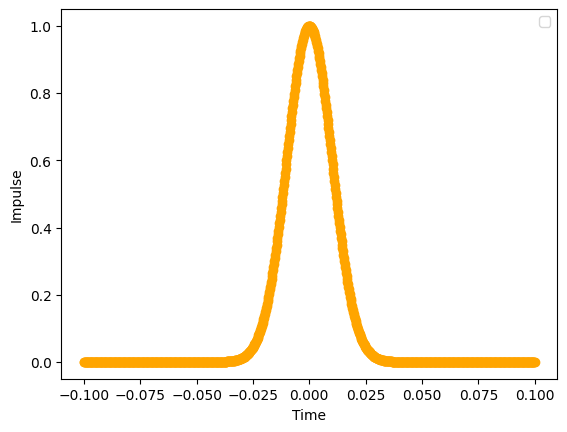

In [77]:
plt.scatter(t_array, impulse0, c='orange')
plt.xlabel("Time")
plt.ylabel('Impulse')
plt.legend()
plt.show()

In [78]:
dz = 0.05 * 10 ** (-6)
Nz = 1000
A = []
A.append(impulse0)

#beta1 = 0.1
eps = 10**(-15)
for i in range(1, Nz):
    new_layer = []
    for j in range(0, len(t_array)):
        if j != 0:
            #if A[i - 1][j] - A[i - 1][j - 1] > eps:
            
                cur_val = A[i - 1][j] - beta1  / dt * (A[i - 1][j] - A[i - 1][j - 1]) * dz
            #else:
               # cur_val = np.round(A[i - 1][j],15)
        else :
             cur_val = 0
             
        new_layer.append(cur_val)
    A.append(new_layer)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


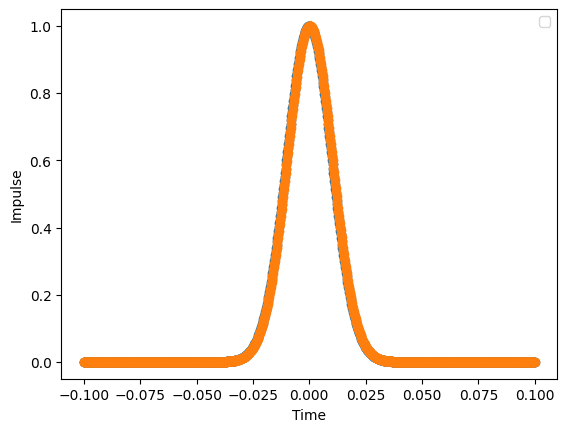

In [79]:
impulse_plot1 = []
impulse_plot2 = []
impulse_plot3 = []
ind1 = 0
ind2 = 999

for i in range(0, Nz):
    impulse_plot1.append(A)

def draw_three_impulses(t_array, impulse1, impulse2):
    plt.scatter(t_array, impulse1)
    plt.scatter(t_array, impulse2)
    #plt.scatter(t, impulse3)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()

draw_three_impulses(t_array, A[ind1], A[ind2])



In [80]:
max1 = np.array(A[ind1]).max()
max2 = np.array(A[ind2]).max()
t_max1 = 0
t_max2 = 0
rem_ind1 = 0
rem_ind2 = 0
for i in range(0, len(t_array)):
    if A[ind1][i] == max1:
        t_max1 = t_array[i]
        rem_ind1 = i
    if A[ind2][i] == max2:
        t_max2 = t_array[i]
        rem_ind2 = i

print((rem_ind2 - rem_ind1) * dz * 10. / (t_max2 - t_max1), 1 / beta1)
        

0.0024974999999999867 0.2296832877641255


In [81]:
A1 = np.zeros((len(impulse0), Nz), dtype=float)
A1[0][0] = 1.
A2 = np.zeros((len(impulse0), Nz), dtype=float)

In [82]:
A1[0]

array([1.92874985e-22, 2.35577991e-22, 2.87620249e-22, 3.51018605e-22,
       4.28219803e-22, 5.22190894e-22, 6.36528384e-22, 7.75589980e-22,
       9.44653501e-22, 1.15010852e-21, 1.39968736e-21, 1.70274334e-21,
       2.07058602e-21, 2.51688457e-21, 3.05815330e-21, 3.71433560e-21,
       4.50950595e-21, 5.47271361e-21, 6.63899610e-21, 8.05059611e-21,
       9.75842209e-21, 1.18238005e-20, 1.43205772e-20, 1.73376362e-20,
       2.09819178e-20, 2.53820335e-20, 3.06925929e-20, 3.70993823e-20,
       4.48255589e-20, 5.41390563e-20, 6.53614358e-20, 7.88784596e-20,
       9.51527166e-20, 1.14738693e-19, 1.38300750e-19, 1.66634572e-19,
       2.00692720e-19, 2.41615094e-19, 2.90765207e-19, 3.49773376e-19,
       4.20588112e-19, 5.05537263e-19, 6.07400698e-19, 7.29496705e-19,
       8.75784625e-19, 1.05098673e-18, 1.26073289e-18, 1.51173222e-18,
       1.81197661e-18, 2.17098209e-18, 2.60007472e-18, 3.11272927e-18,
       3.72497023e-18, 4.45584624e-18, 5.32799147e-18, 6.36828923e-18,
      

In [83]:
#beta2 = beta2
eps = 10**(-15)
for i in range(0, len(t_array)-1):
    new_layer = []
    for j in range(0, Nz):
        if j == 0:
            m1 = 0
            m2 = 0
            A1[i + 1][j] = A1[i][j] + dt / (dz ** 2) * (0. - 2 * A2[i][j] + A2[i][j+1]) + np.sqrt(( m2 * A1[i][j+1]) ** 2 + (m2 * A2[i][j+1]) ** 2)
            
        if j == Nz-1:
            m1 = 0
            m2 =  0
            A1[i + 1][j] = A1[i][j] + dt / (dz ** 2) * (A2[i][j-1] - 2 * A2[i][j] + 0.) + np.sqrt((m1 * A1[i][j-1]) ** 2 + (m1 * A2[i][j-1]) ** 2)

        if j != 0 and j != Nz - 1:
            m1 = 0
            m2 = 0
            A1[i + 1][j] = A1[i][j] + dt / (dz ** 2) * (A2[i][j-1] - 2 * A2[i][j] + A2[i][j+1]) + np.sqrt((m1 * A1[i][j-1] + m2 * A1[i][j+1]) ** 2 + (m1 * A2[i][j-1] + m2 * A2[i][j+1]) ** 2)





    new_layer = []
    for j in range(0, Nz):
        if j != 0 and j != Nz - 1:
            m1 = A1[i][j-1] * A1[i][j-1] + A2[i][j-1] * A2[i][j-1]
            m2 =  (A1[i][j+1] * A1[i][j+1]  + A2[i][j+1] * A2[i][j+1])
            A2[i + 1][j] = A2[i][j] - dt / (dz ** 2) * (A1[i][j-1] - 2 * A1[i][j] + A1[i][j+1]) + np.sqrt((m1 * A1[i][j-1] + m2 * A1[i][j+1]) ** 2 + (m1 * A2[i][j-1] + m2 * A2[i][j+1]) ** 2)

        if j == 0:
            m1 = 0.
            m2 =  (A1[i][j+1] * A1[i][j+1]  + A2[i][j+1] * A2[i][j+1])
            A2[i + 1][j] = A2[i][j] - dt / (dz ** 2) * (0 - 2 * A1[i][j] + A1[i][j+1]) + np.sqrt(( m2 * A1[i][j+1]) ** 2 + (m2 * A2[i][j+1]) ** 2)

        if j == Nz - 1:
            m1 = A1[i][j-1] * A1[i][j-1] + A2[i][j-1] * A2[i][j-1]
            m2 =  0
            A2[i + 1][j] = A2[i][j] - dt / (dz ** 2) * (A1[i][j-1] - 2 * A1[i][j] + 0) + np.sqrt((m1 * A1[i][j-1]) ** 2 + (m1 * A2[i][j-1]) ** 2)

    

C:\Users\dellx\AppData\Local\Temp\ipykernel_14560\2221640315.py:30: RuntimeWarning: overflow encountered in scalar power
  A2[i + 1][j] = A2[i][j] - dt / (dz ** 2) * (A1[i][j-1] - 2 * A1[i][j] + A1[i][j+1]) + np.sqrt((m1 * A1[i][j-1] + m2 * A1[i][j+1]) ** 2 + (m1 * A2[i][j-1] + m2 * A2[i][j+1]) ** 2)
C:\Users\dellx\AppData\Local\Temp\ipykernel_14560\2221640315.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  A1[i + 1][j] = A1[i][j] + dt / (dz ** 2) * (A2[i][j-1] - 2 * A2[i][j] + A2[i][j+1]) + np.sqrt((m1 * A1[i][j-1] + m2 * A1[i][j+1]) ** 2 + (m1 * A2[i][j-1] + m2 * A2[i][j+1]) ** 2)
C:\Users\dellx\AppData\Local\Temp\ipykernel_14560\2221640315.py:19: RuntimeWarning: invalid value encountered in scalar add
  A1[i + 1][j] = A1[i][j] + dt / (dz ** 2) * (A2[i][j-1] - 2 * A2[i][j] + A2[i][j+1]) + np.sqrt((m1 * A1[i][j-1] + m2 * A1[i][j+1]) ** 2 + (m1 * A2[i][j-1] + m2 * A2[i][j+1]) ** 2)
C:\Users\dellx\AppData\Local\Temp\ipykernel_14560\2221640315.py:19: RuntimeWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


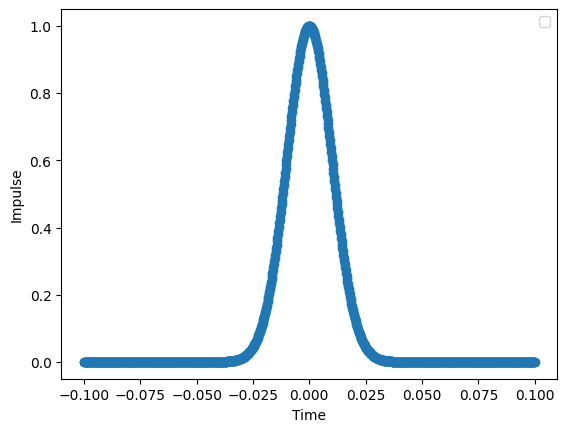

In [86]:

def draw_three_impulses(t, impulse1, impulse2):
    plt.scatter(t, impulse1)
    plt.scatter(t, impulse2)
    #plt.scatter(t, impulse3)
    plt.xlabel("Time")
    plt.ylabel('Impulse')
    plt.legend()
    plt.show()

draw_three_impulses(generate_impulse(T, Nz)[0], A1[0], A1[999])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


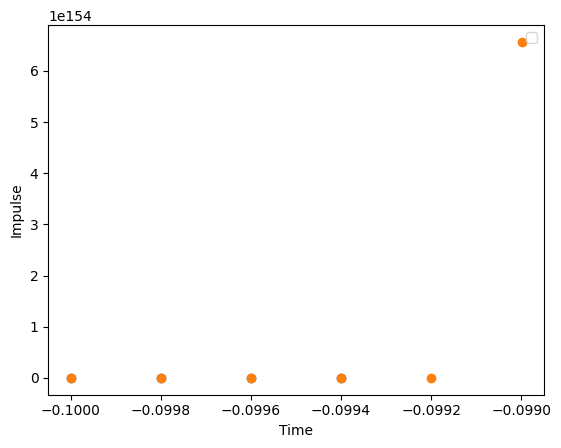

In [ ]:
arr1 = []
arr2 = []

for i in range(0, Nz):
    arr1.append(A1[i][500] ** 2 + A2[i][500] ** 2)
    arr2.append(A1[i][999] ** 2 + A2[i][999] ** 2)

draw_three_impulses(generate_impulse(T, Nz)[0], arr1, arr2)


In [ ]:
A1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])